<a href="https://colab.research.google.com/github/AaronARdz/TextDataVisualization/blob/main/large_numbers_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# the law of great numbers
import numpy as np
import matplotlib.pyplot as plt

population_size = 2.3e5 #scientific notation


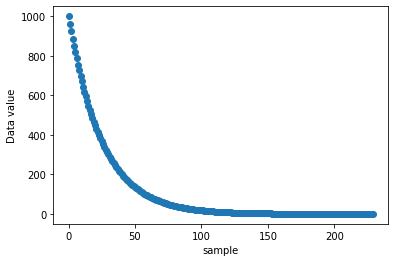

In [43]:
# Generate the population of numbers
# Scale log up (logspace), scale log down()
population = 1 / np.logspace(np.log10(.001),np.log10(10),int(population_size))

# plot only every 1000 
skip = int(1e3)
plt.plot(population[::skip],'o')

plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()

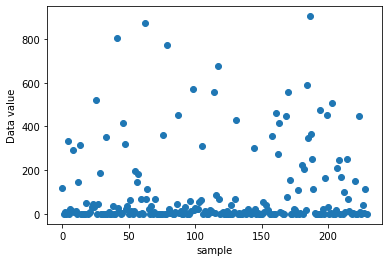

In [44]:
# Shuffle the data
np.random.shuffle(population)

plt.plot(population[::skip],'o')

plt.xlabel('sample')
plt.ylabel('Data value')
plt.show()